<a href="https://colab.research.google.com/github/jodiaz04/Machine-learning---proyectos-/blob/main/solucion_act_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Johan Diaz,
Julian Suarez,
Natalia Arcila

In [1]:
pip install wooldridge


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 13.7 MB/s eta 0:00:00


In [28]:
from google.colab import files
import pandas as pd
import wooldridge as wd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [29]:
upload= files.upload()

Saving activity_2_ml.xlsx to activity_2_ml (1).xlsx


In [30]:
pgn = pd.read_excel("/content/activity_2_ml.xlsx")

In [31]:
pgn

,YEAR,AGE,DISTANCE_BUS,DISTANCE_INTERSTATE,PRICE,ROOMS,AREA,LAND,BATHS
0,1978,1,30000.0,30000.0,75900.0,7,1836,45738.0,2
1,1981,7,22000.0,22000.0,140000.0,6,1800,44867.0,3
2,1981,31,3000.0,2000.0,68000.0,6,3304,18731.0,2
3,81,2,15000.0,17000.0,NaN,7,2744,77101.0,3
4,1981,0,10000.0,13000.0,216000.0,7,2548,46174.0,3
...,...,...,...,...,...,...,...,...,...
348,1981,51,2000.0,5000.0,50000.0,5,1140,13945.0,1
349,81,1,22000.0,24000.0,162000.0,7,2656,45302.0,3
350,78,3,12000.0,12000.0,64900.0,7,2856,29955.0,2
351,1978,26,20000.0,22000.0,58000.0,6,1356,544500.0,2


In [32]:
pgn.duplicated().sum()

12

In [33]:
pgn.drop_duplicates(inplace=True)
pgn.reset_index(drop=True, inplace=True)

In [34]:
pgn.duplicated().sum()

0

In [35]:
pgn

,YEAR,AGE,DISTANCE_BUS,DISTANCE_INTERSTATE,PRICE,ROOMS,AREA,LAND,BATHS
0,1978,1,30000.0,30000.0,75900.0,7,1836,45738.0,2
1,1981,7,22000.0,22000.0,140000.0,6,1800,44867.0,3
2,1981,31,3000.0,2000.0,68000.0,6,3304,18731.0,2
3,81,2,15000.0,17000.0,NaN,7,2744,77101.0,3
4,1981,0,10000.0,13000.0,216000.0,7,2548,46174.0,3
...,...,...,...,...,...,...,...,...,...
336,1981,51,2000.0,5000.0,50000.0,5,1140,13945.0,1
337,81,1,22000.0,24000.0,162000.0,7,2656,45302.0,3
338,78,3,12000.0,12000.0,64900.0,7,2856,29955.0,2
339,1978,26,20000.0,22000.0,58000.0,6,1356,544500.0,2


In [36]:
def estandarizar_año(row):
    año = str(row['YEAR'])
    if len(año) == 1:
        if año == '78':
            año = '1978'
        elif año == '81':
            año = '1981'
    return año

In [37]:
pgn['YEAR'] = pgn.apply(estandarizar_año, axis=1)


In [38]:
pgn["YEAR"].unique()

array(['1978.0', '1981.0', '81.0', '78.0'], dtype=object)

In [39]:
dictio_correct = {"1978.0":"1978",
"78.0":"1978",
"81.0":"1981",
"1981.0":"1981"}

In [40]:
pgn["YEAR"]= pgn["YEAR"].map(dictio_correct)

In [41]:
 pgn["YEAR"].unique()

array(['1978', '1981'], dtype=object)

In [42]:
pgn

,YEAR,AGE,DISTANCE_BUS,DISTANCE_INTERSTATE,PRICE,ROOMS,AREA,LAND,BATHS
0,1978,1,30000.0,30000.0,75900.0,7,1836,45738.0,2
1,1981,7,22000.0,22000.0,140000.0,6,1800,44867.0,3
2,1981,31,3000.0,2000.0,68000.0,6,3304,18731.0,2
3,1981,2,15000.0,17000.0,NaN,7,2744,77101.0,3
4,1981,0,10000.0,13000.0,216000.0,7,2548,46174.0,3
...,...,...,...,...,...,...,...,...,...
336,1981,51,2000.0,5000.0,50000.0,5,1140,13945.0,1
337,1981,1,22000.0,24000.0,162000.0,7,2656,45302.0,3
338,1978,3,12000.0,12000.0,64900.0,7,2856,29955.0,2
339,1978,26,20000.0,22000.0,58000.0,6,1356,544500.0,2


In [18]:
pgn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 341 non-null    object 
 1   AGE                  341 non-null    int64  
 2   DISTANCE_BUS         341 non-null    float64
 3   DISTANCE_INTERSTATE  341 non-null    float64
 4   PRICE                271 non-null    float64
 5   ROOMS                341 non-null    int64  
 6   AREA                 341 non-null    int64  
 7   LAND                 341 non-null    float64
 8   BATHS                341 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 24.1+ KB


In [43]:
pgn.isna().sum()

YEAR                    0
AGE                     0
DISTANCE_BUS            0
DISTANCE_INTERSTATE     0
PRICE                  70
ROOMS                   0
AREA                    0
LAND                    0
BATHS                   0
dtype: int64

In [44]:
def funcion2(row):
  pgn = row["PRICE"]
  if pgn == 1:
    return "uno"
  return pgn

In [45]:
pgn["PRICE_PROBLEMS"] = pgn.apply(funcion2, axis=1)

In [46]:
pgn["PRICE_PROBLEMS"]=pgn["PRICE"].astype(str)

In [47]:
pgn.duplicated().sum()

9

In [48]:
pgn.drop_duplicates(inplace=True)
pgn.reset_index(drop=True, inplace=True)

In [49]:
pgn.duplicated().sum()

0

In [50]:
pgn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 332 non-null    object 
 1   AGE                  332 non-null    int64  
 2   DISTANCE_BUS         332 non-null    float64
 3   DISTANCE_INTERSTATE  332 non-null    float64
 4   PRICE                262 non-null    float64
 5   ROOMS                332 non-null    int64  
 6   AREA                 332 non-null    int64  
 7   LAND                 332 non-null    float64
 8   BATHS                332 non-null    int64  
 9   PRICE_PROBLEMS       332 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 26.1+ KB


In [51]:
pgn

,YEAR,AGE,DISTANCE_BUS,DISTANCE_INTERSTATE,PRICE,ROOMS,AREA,LAND,BATHS,PRICE_PROBLEMS
0,1978,1,30000.0,30000.0,75900.0,7,1836,45738.0,2,75900.0
1,1981,7,22000.0,22000.0,140000.0,6,1800,44867.0,3,140000.0
2,1981,31,3000.0,2000.0,68000.0,6,3304,18731.0,2,68000.0
3,1981,2,15000.0,17000.0,NaN,7,2744,77101.0,3,nan
4,1981,0,10000.0,13000.0,216000.0,7,2548,46174.0,3,216000.0
...,...,...,...,...,...,...,...,...,...,...
327,1981,51,2000.0,5000.0,50000.0,5,1140,13945.0,1,50000.0
328,1981,1,22000.0,24000.0,162000.0,7,2656,45302.0,3,162000.0
329,1978,3,12000.0,12000.0,64900.0,7,2856,29955.0,2,64900.0
330,1978,26,20000.0,22000.0,58000.0,6,1356,544500.0,2,58000.0


In [52]:
pgn.isna().sum()

YEAR                    0
AGE                     0
DISTANCE_BUS            0
DISTANCE_INTERSTATE     0
PRICE                  70
ROOMS                   0
AREA                    0
LAND                    0
BATHS                   0
PRICE_PROBLEMS          0
dtype: int64

<Axes: xlabel='DISTANCE_BUS', ylabel='Count'>

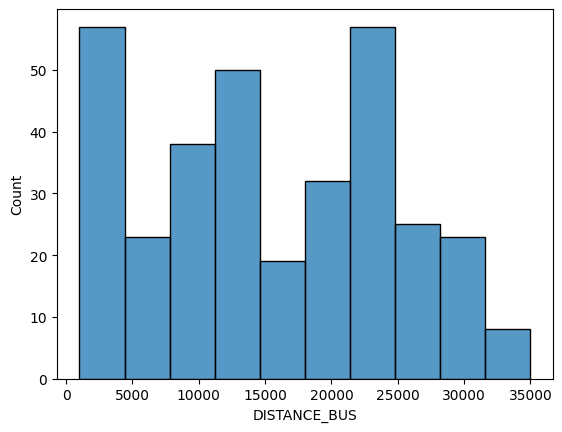

In [53]:
sns.histplot(x=pgn['DISTANCE_BUS'])

<Axes: xlabel='DISTANCE_INTERSTATE', ylabel='Count'>

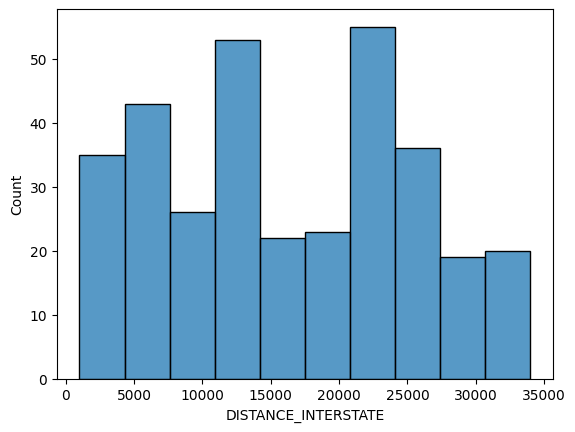

In [54]:
sns.histplot(x=pgn['DISTANCE_INTERSTATE'])

<Axes: xlabel='PRICE', ylabel='Count'>

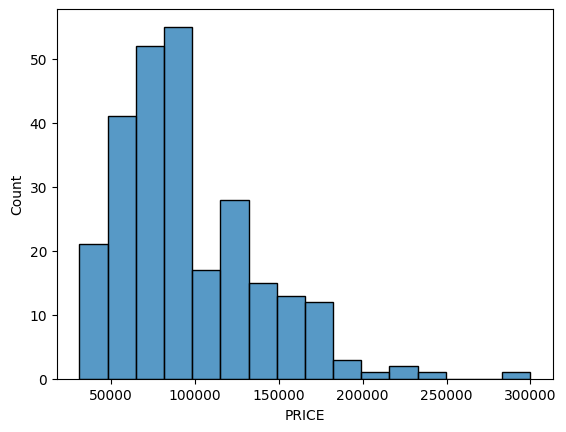

In [55]:
sns.histplot(x=pgn['PRICE'])

<Axes: xlabel='LAND', ylabel='Count'>

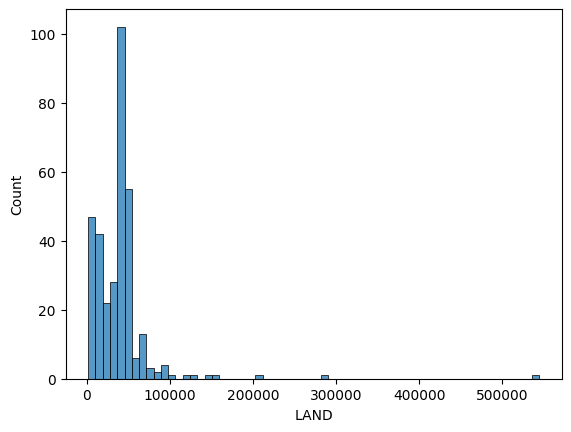

In [56]:
sns.histplot(x=pgn['LAND'])

<Axes: xlabel='PRICE_PROBLEMS', ylabel='Count'>

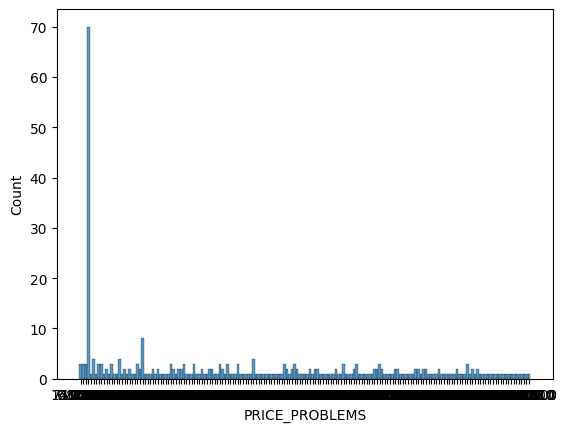

In [57]:
sns.histplot(x=pgn['PRICE_PROBLEMS'])

<Axes: xlabel='AREA', ylabel='Count'>

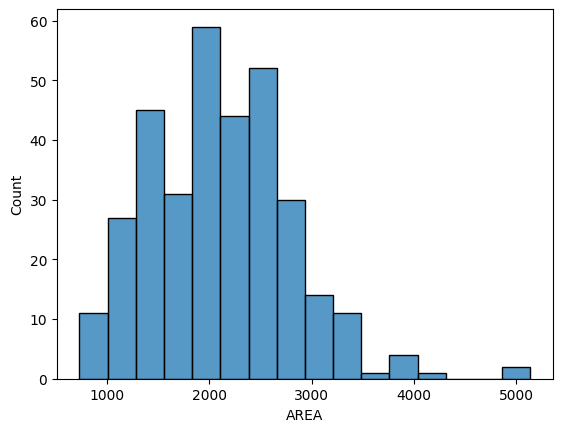

In [58]:
sns.histplot(x=pgn['AREA'])

<Axes: xlabel='DISTANCE_BUS', ylabel='PRICE'>

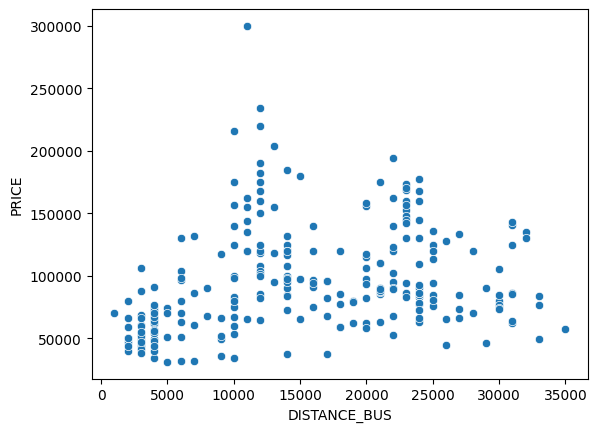

In [59]:
sns.scatterplot(data=pgn, y='PRICE', x="DISTANCE_BUS")

<Axes: xlabel='DISTANCE_INTERSTATE', ylabel='PRICE'>

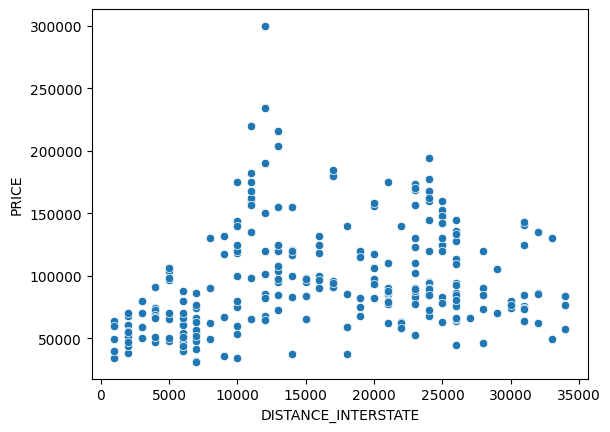

In [60]:

sns.scatterplot(data=pgn, y='PRICE', x="DISTANCE_INTERSTATE")

<Axes: xlabel='AREA', ylabel='PRICE'>

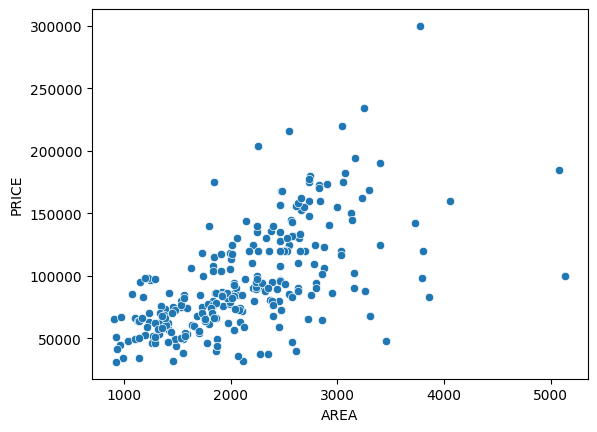

In [61]:

sns.scatterplot(data=pgn, y='PRICE', x="AREA")

<Axes: xlabel='LAND', ylabel='PRICE'>

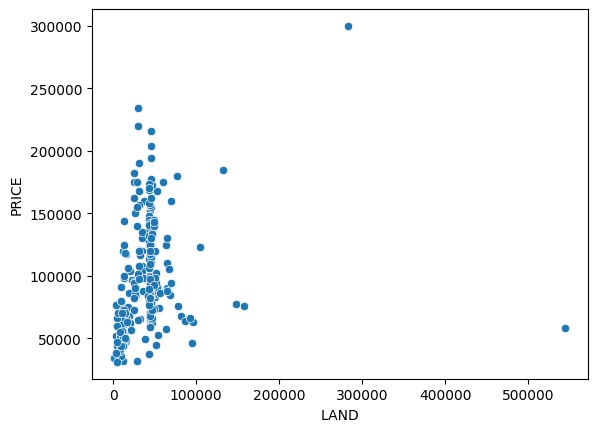

In [62]:

sns.scatterplot(data=pgn, y='PRICE', x="LAND")

<Axes: xlabel='YEAR', ylabel='PRICE'>

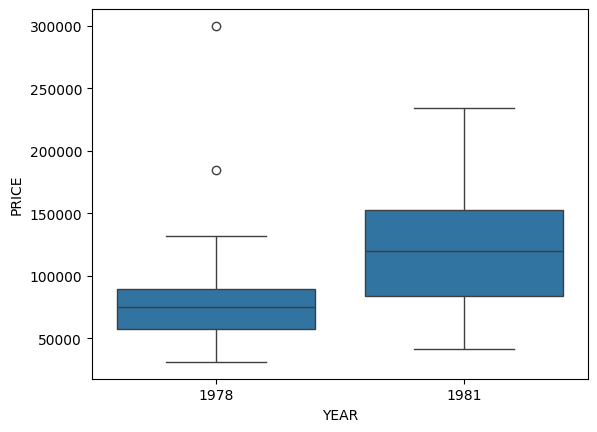

In [63]:

sns.boxplot(data=pgn, y='PRICE', x="YEAR")

<Axes: xlabel='AGE', ylabel='PRICE'>

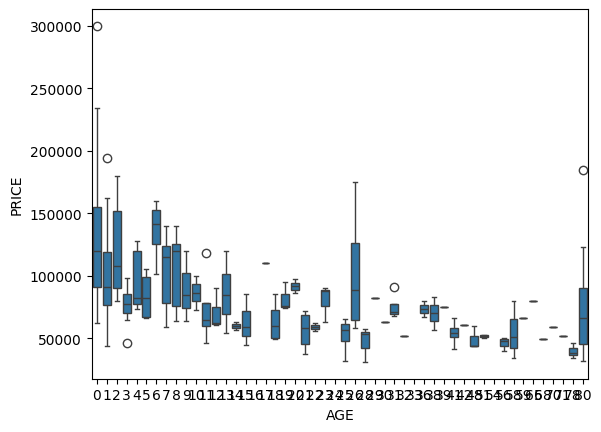

In [64]:

sns.boxplot(data=pgn, y='PRICE', x="AGE")

<Axes: xlabel='ROOMS', ylabel='PRICE'>

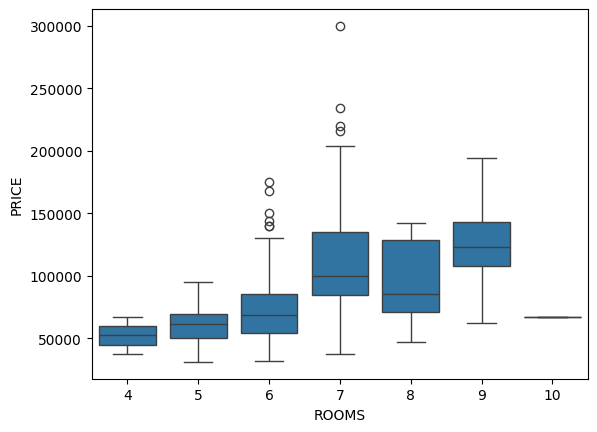

In [65]:

sns.boxplot(data=pgn, y='PRICE', x="ROOMS")

<Axes: xlabel='BATHS', ylabel='PRICE'>

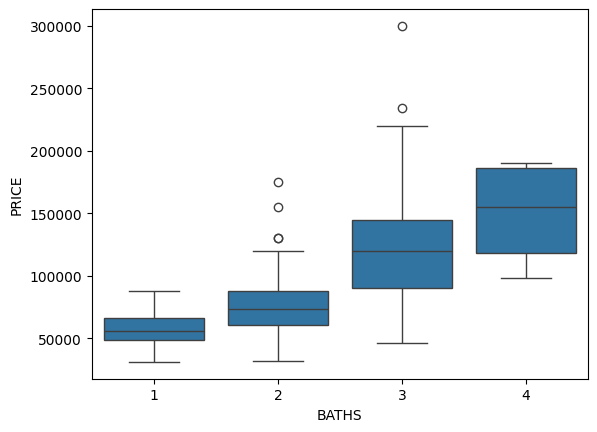

In [66]:
sns.boxplot(data=pgn, y='PRICE', x="BATHS")